In [12]:
'''
Created on 2nd November 2016
@author: Daniel Durrenberger
daniel.durrenberger@amaris.com

Python 2.7.12
Pandas 0.18.1
Numpy 1.11.1
Scipy 0.18.0
'''
import pyeemd
import utils
import time
import numpy as np
import scipy
import matplotlib.pyplot as plt
import manage_data as md
import preprocessing as pp
import processing as pc
from scipy.io.wavfile import write

def export_sticking_sound(
        coil=28,
        cropTime=None,
        normalize=False,
        filename='sticking_coil_'
        ):
    ############################# IMPORT COIL #################################
    #print('...import coil '+str(coil)+' from hdf...')
    dfi = md.import_dfi()
    df = md.import_data(coil=coil)
    t, signal, speed, decoiler, coiler = md.dfToArrays(df)
    a, b, n, dt, fs = md.xInfo(t)
    #print('          ...'+str(n)+' points...')

    ############################# ABOUT COIL ##################################
    thickness = dfi.thickness[coil]
    sticking = dfi.sticking[coil]
    duration = dfi.duration[coil]-5
    filename = filename + str(coil) + '.wav'
    if sticking:
        sti, sei = dfi.t_begin[coil], dfi.t_end[coil]
        cropTime = [int(sti*0.9), min(sti+120., duration)]
        #print('...coil is sticking from '+str(sti)+' to '+str(sei)+'s...')
        stick = ' sticking in ['+str(sti)+','+str(sei)+']'
    else:
        #print('...no marks have been detected on this coil...')
        #print('not sticking')
        return
    metadata = 'Coil '+str(coil)+stick

    ############################# DIVIDE BY RMS ###############################
    if normalize:
        #print('...divide signal by RMS on a 5s window...')
        signal /= pp.fast_rms(signal)

    ############################# CROP TIME ZONE ##############################
    beginning = 0 # used for autocorrelation xaxis
    cropTime = None
    if cropTime is not None:
        i0, iN = int(fs*cropTime[0]), int(fs*cropTime[1])
        beginning = cropTime[0]  # used for autocorrelation xaxis
        #print('...crop between '+str(cropTime)+'s...')
        t, signal, speed, decoiler, coiler = md.dfToArrays(df, i0, iN)
        a, b, n, dt, fs = md.xInfo(t)
        metadata += ' cropped on '+str(cropTime)
        #print('          ...'+str(n)+' points...')

    ############################# PRODUCE WAV FILE ###########################
    #write(filename, fs, signal)
    
    return coil, sti, sei

def marker(fs, length, begin, end):
    sticking = np.zeros(length, dtype=bool)
    for start, stop in zip(begin, end):
        indx1 = int(start*fs)
        indx2 = int(stop*fs)
        sticking[indx1:indx2] = True
    return sticking

In [ ]:
all_coils = list( set(range(88)) - set([31]) )
startTime = time.time()
coil_list = all_coils
n = len(coil_list)
c = 0
fail = []
coil_dict = {}
for coil in coil_list:
    c += 1
    n -= 1
    coilname = 'coil_' + str(coil)
    if coil<10:
        coilname = 'coil_0' + str(coil)
    try:
        c, sti, sei = export_sticking_sound(
                            coil=coil
                            )
        coil_dict[coilname] = {'startsec':sti, 'endsec':sei}
        if np.mod(coil,10)==0:
            soFarDuration = np.round((time.time()-startTime)/60,1)
            estimatedTimeLeft = np.round((n*soFarDuration/c),1)
            print('             ELAPSED TIME : '+str(soFarDuration)+' min')
            print('      ESTIMATED LEFT TIME : '+str(estimatedTimeLeft)+' min')
    except:
        fail.append(coil)
        pass
totalTime = int((time.time()-startTime)/60)+1
print('TOTAL TIME : '+str(totalTime)+' min')
print('FAILS : '+str(fail))

In [1]:
coil_dict = {'coil_02': {'endsec': 125.0, 'startsec': 89.0},
 'coil_03': {'endsec': 127.0, 'startsec': 66.0},
 'coil_04': {'endsec': 108.0, 'startsec': 83.0},
 'coil_06': {'endsec': 271.0, 'startsec': 224.0},
 'coil_07': {'endsec': 171.0, 'startsec': 49.0},
 'coil_08': {'endsec': 83.0, 'startsec': 51.0},
 'coil_09': {'endsec': 228.0, 'startsec': 221.0},
 'coil_12': {'endsec': 26.0, 'startsec': 23.0},
 'coil_13': {'endsec': 89.0, 'startsec': 21.0},
 'coil_17': {'endsec': 62.0, 'startsec': 52.0},
 'coil_19': {'endsec': 314.0, 'startsec': 227.0},
 'coil_20': {'endsec': 119.0, 'startsec': 71.0},
 'coil_21': {'endsec': 112.0, 'startsec': 81.0},
 'coil_27': {'endsec': 294.0, 'startsec': 253.0},
 'coil_28': {'endsec': 149.0, 'startsec': 94.0},
 'coil_29': {'endsec': 120.0, 'startsec': 68.0},
 'coil_32': {'endsec': 280.0, 'startsec': 225.0},
 'coil_34': {'endsec': 90.0, 'startsec': 72.0},
 'coil_37': {'endsec': 88.0, 'startsec': 66.0},
 'coil_38': {'endsec': 126.0, 'startsec': 65.0},
 'coil_40': {'endsec': 111.0, 'startsec': 8.0},
 'coil_43': {'endsec': 73.0, 'startsec': 16.0},
 'coil_44': {'endsec': 88.0, 'startsec': 77.0},
 'coil_50': {'endsec': 103.0, 'startsec': 23.0},
 'coil_52': {'endsec': 109.0, 'startsec': 90.0},
 'coil_53': {'endsec': 125.0, 'startsec': 91.0},
 'coil_56': {'endsec': 208.0, 'startsec': 177.0},
 'coil_62': {'endsec': 103.0, 'startsec': 54.0},
 'coil_65': {'endsec': 196.0, 'startsec': 101.0},
 'coil_66': {'endsec': 111.0, 'startsec': 70.0},
 'coil_71': {'endsec': 303.0, 'startsec': 141.0},
 'coil_72': {'endsec': 126.0, 'startsec': 16.0},
 'coil_74': {'endsec': 135.0, 'startsec': 84.0},
 'coil_78': {'endsec': 206.0, 'startsec': 52.0},
 'coil_79': {'endsec': 140.0, 'startsec': 79.0},
 'coil_80': {'endsec': 138.0, 'startsec': 75.0},
 'coil_81': {'endsec': 171.0, 'startsec': 33.0},
 'coil_82': {'endsec': 129.0, 'startsec': 13.0},
 'coil_83': {'endsec': 111.0, 'startsec': 59.0}}

In [5]:
len(coil_dict)

39

In [40]:
import xlsxwriter
md.export_excelfile(df)

()

In [28]:
import pandas as pd
df = pd.DataFrame(coil_dict.values(), index=coil_dict.keys())

In [29]:
coil_dict.values

<function values>

In [38]:
df = df.sort_index()

In [39]:
df

,endsec,startsec
coil_02,125.0,89.0
coil_03,127.0,66.0
coil_04,108.0,83.0
coil_06,271.0,224.0
coil_07,171.0,49.0
coil_08,83.0,51.0
coil_09,228.0,221.0
coil_12,26.0,23.0
coil_13,89.0,21.0
coil_17,62.0,52.0


In [3]:
a = np.zeros(5)

In [4]:
a

array([ 0.,  0.,  0.,  0.,  0.])

In [5]:
np.zeros_like(a)

array([ 0.,  0.,  0.,  0.,  0.])

In [19]:
marker(1, 12, [2,5], [7,10])

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True, False, False], dtype=bool)

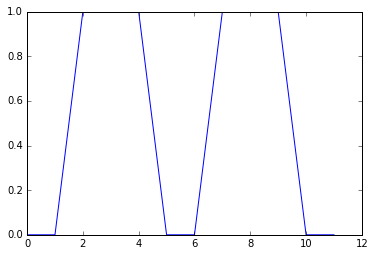

In [22]:
%matplotlib inline
plt.plot(marker(1, 12, [2,7], [5,10]))